In [1]:
%reload_ext autoreload
%autoreload 2

# Static potential

In [13]:

#!/usr/bin/env python
# -*- coding:utf-8 -*-
#
# Created: 06/2023
# Author: Carmelo Mordini <cmordini@phys.ethz.ch>


import numpy as np
from pytrans import objectives as obj
from pytrans.conversion import freq_to_curv
from pytrans.ions import Ca40
from pytrans.functions import zpspace
from pytrans.solver import solver, init_waveform

from models.segmented_trap import SegmentedTrap

from pathlib import Path
data_dir = Path('.').resolve() / 'data'

trap = SegmentedTrap()

n_samples = 1
waveform = init_waveform(n_samples, trap.n_electrodes)

r0 = (0, 0, trap.z0)
ion = Ca40
axial_curv = freq_to_curv(1e6, ion=Ca40)
radial_curv = 2.5e7


objectives = [
    obj.GradientObjective(waveform[0], trap, *r0, value=0, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='xx', value=axial_curv, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='yz', value=radial_curv, ion=Ca40),
 
    obj.VoltageObjective(waveform, 0),
    obj.VoltageObjective(waveform, 10, constraint_type='<='),
    obj.VoltageObjective(waveform, -10, constraint_type='>='),
]

solver_results = solver(objectives, verbose=True)
waveform = solver_results.waveform.value  # get array from cvxpy variable

savename = data_dir / 'waveform_static_segmented_trap.npy'
print(f"Saving waveform as ndarray to {savename}")
np.save(savename, waveform)


Compiling objectives: 100%|██████████| 6/6 [00:00<00:00, 176.47it/s]


                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Aug 23 11:27:27 AM: Your problem has 6 variables, 2 constraints, and 0 parameters.
(CVXPY) Aug 23 11:27:27 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 23 11:27:27 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 23 11:27:27 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 23 11:27:27 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Aug 23 11:27:27 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

## Analysis

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[ 0.0006  0.0025 -0.0029]
Gradient [V/m]
[ 0.0101  0.2246 -0.3547]
Displacement at 1 MHz [um]
[ 0.0006  0.0137 -0.0217]
Hessian [V/m2]
[[ 1.6185e+07 -4.9001e+04  3.5328e+04]
 [-4.9001e+04  1.1672e+08  2.5000e+07]
 [ 3.5328e+04  2.5000e+07  1.4452e+08]]
Normal mode frequencies [MHz]
[0.994892 2.49783 3.12055]
Eigenvectors
[[1 0.000584 -0.000389]
 [-0.000701 0.862 -0.507]
 [3.92e-05 0.507 0.862]]
Tilt angle of mode 2 (3.12): 59.54°

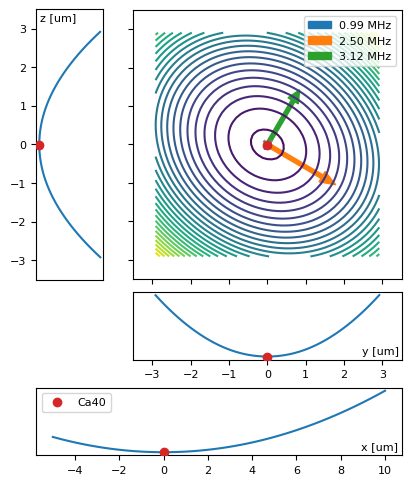

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from models.segmented_trap import SegmentedTrap
from models.segmented_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

trap = SegmentedTrap()
waveform = np.load(data_dir / 'waveform_static_segmented_trap.npy')

r0 = (0, 0, trap.z0)
roi = ((-5e-6, 10e-6), 3.5e-6, 3.5e-6)
res = analyse_potential(trap, voltages=waveform[0], ions=Ca40, r0=r0, roi=roi, verbose=False)
res


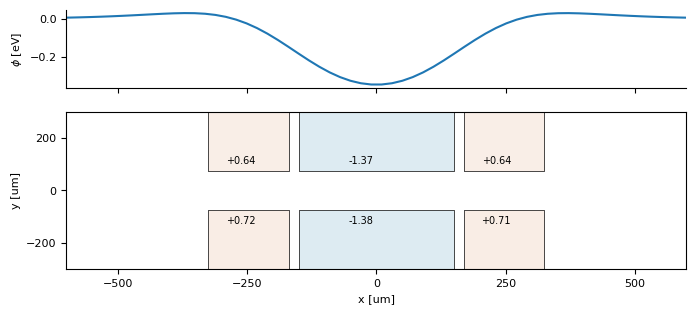

In [15]:
_ = plot_voltages_on_trap(trap, waveform[0])


## Mixed-species ion crystal

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[-0.004  -0.0029 -0.001 ]
Gradient [V/m]
[-0.0648 -0.3636 -0.2222]
Displacement at 1 MHz [um]
[-0.004  -0.0222 -0.0136]
Hessian [V/m2]
[[ 1.6351e+07 -5.0018e+04  3.3329e+04]
 [-5.0018e+04  1.1681e+08  2.7633e+07]
 [ 3.3329e+04  2.7633e+07  1.4487e+08]]
Normal mode frequencies [MHz]
[1 2.47118 3.146]
Eigenvectors
[[1 0.000605 -0.000389]
 [-0.000719 0.852 -0.523]
 [1.54e-05 0.523 0.852]]
Tilt angle of mode 2 (3.15): 58.46°
--------------
Mode solver analysis for ion crystal [Be9, Ca40, Ca40, Be9]: 
Equilibrium positions [um]
[[-6.3869 -0.0032 -0.0461]
 [-2.0263 -0.0045  0.0094]
 [ 2.01    0.0004  0.0064]
 [ 6.3609 -0.0002 -0.0497]]
Normal modes
  Freq [MHz]                     Be9                                Ca40                                Ca40                                Be9
------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ---------  ----

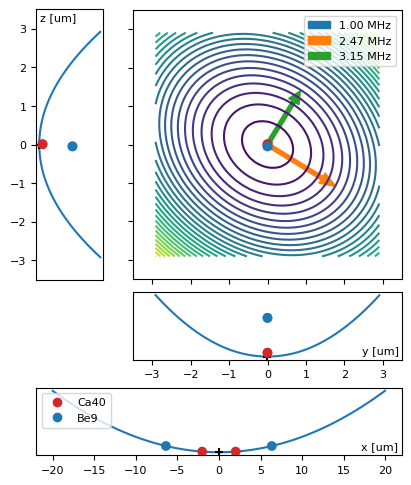

In [5]:
from pytrans.ions import Ca40, Be9
from pytrans.analysis import analyse_potential

r0 = (0, 0, trap.z0)
roi = (20e-6, 3.5e-6, 3.5e-6)

ions = [Be9, Ca40, Ca40, Be9]
res = analyse_potential(trap, voltages=waveform[0], ions=ions, ion1=Ca40, r0=r0, roi=roi, verbose=False)
res

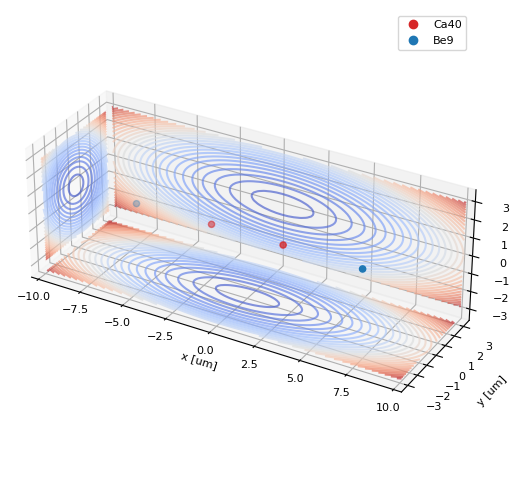

In [6]:
from pytrans.plotting import plot3d_potential

roi = (10e-6, 3.5e-6, 3.5e-6)
_ = plot3d_potential(trap, waveform[0], Ca40, r0, roi, analyse_results=res)